![](https://img.freepik.com/free-vector/finance-financial-performance-concept-illustration_53876-40450.jpg?w=2000)

In [1]:
#Required Libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from wordcloud import WordCloud
import matplotlib.colors as mcolors

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

import xgboost as xgb
import torch

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/

In [3]:
df = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
def PreProcessing(sent):
    final_sent = []
    output_string = ''
    lm = WordNetLemmatizer()
    
    sent = sent.lower()
    re_sent = re.sub('[^a-zA-Z]', ' ', str(sent))
    re_sent = word_tokenize(re_sent)
    
    for word in re_sent:
        if word not in set(stopwords.words('english')):
            final_sent.append(lm.lemmatize(word))
            
    for word in final_sent:
        output_string += word + ' '
    
    return final_sent, output_string
    
    
#df['Sentence'] = df['Sentence'].progress_apply(PreProcessing)

In [5]:
y, levels = pd.factorize(df['Sentiment'])
document = []

for idx, row in tqdm(df.iterrows()):
    _, result = PreProcessing(row['Sentence'])
    document.append(result)

5842it [00:18, 312.38it/s]


In [6]:
vecotrizer = CountVectorizer(stop_words='english')
vectorizer_result = vecotrizer.fit_transform(document).toarray()

x_train, x_valid, y_train, y_valid = train_test_split(vectorizer_result, y, random_state=42)

In [7]:
torch.cuda.is_available()

True

In [8]:
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

In [9]:
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print('Validation Accuracy score : ', accuracy_score(y_valid, y_pred))

Validation Accuracy score :  0.6837782340862423


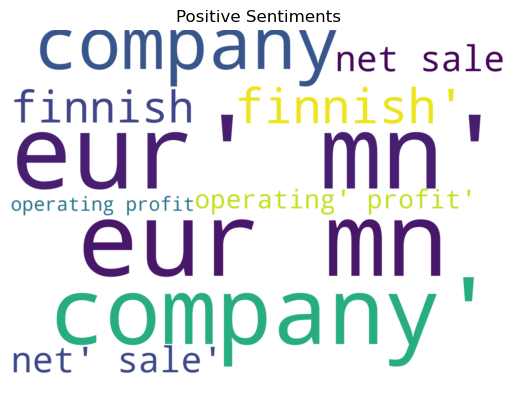

In [10]:
positive_sentiment = []
for idx, row in df[df['Sentiment']=='positive'].iterrows():
    positive_sentiment.append(PreProcessing(row['Sentence']))
    
text = str(positive_sentiment)
wordcloud = WordCloud(stopwords='english',
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      prefer_horizontal=1.0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments')
plt.show()

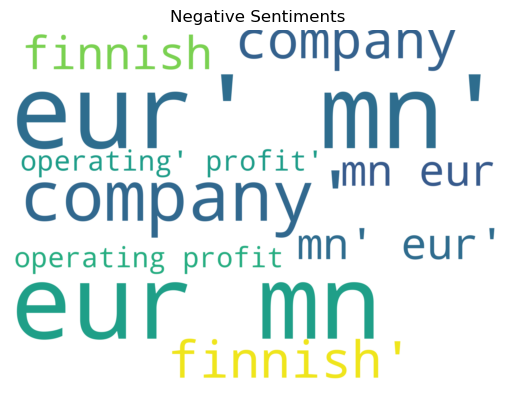

In [11]:
negative_sentiment = []
for idx, row in df[df['Sentiment']=='negative'].iterrows():
    negative_sentiment.append(PreProcessing(row['Sentence']))
    
text = str(negative_sentiment)
wordcloud = WordCloud(stopwords='english',
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      prefer_horizontal=1.0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')
plt.show()

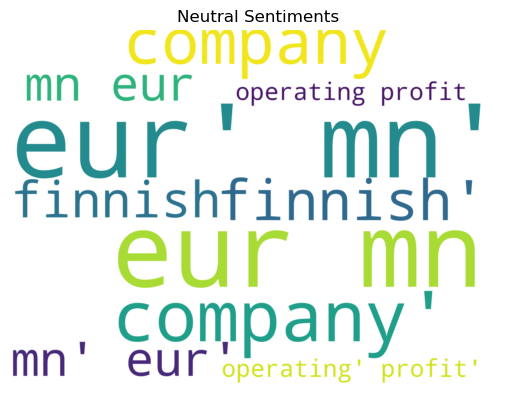

In [12]:
neutral_sentiment = []
for idx, row in df[df['Sentiment']=='negative'].iterrows():
    neutral_sentiment.append(PreProcessing(row['Sentence']))
    
text = str(neutral_sentiment)
wordcloud = WordCloud(stopwords='english',
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      prefer_horizontal=1.0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')
plt.show()

In [13]:
print('Accuracy of the Model : ', accuracy_score(y_valid, y_pred))
#print('Recall of the Model : ', recall_score(y_valid, y_pred))
#print('F1 score of the Model : ', f1_score(y_valid, y_pred))

Accuracy of the Model :  0.6837782340862423


In [14]:
import seaborn as sns
cf_matrix = confusion_matrix(y_valid, y_pred)

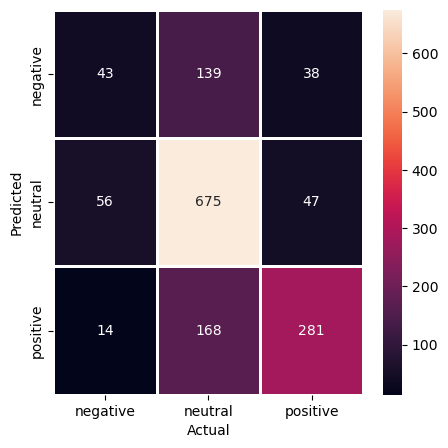

In [15]:
cf_matrix = pd.crosstab(levels[y_valid],levels[y_pred])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

> Warm Welcome of Feedback

> Just an Assignment Work